# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [117]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 108.0.5359
[WDM] - Get LATEST chromedriver version for 108.0.5359 google-chrome
[WDM] - Driver [C:\Users\MankweNdosi\.wdm\drivers\chromedriver\win32\108.0.5359.71\chromedriver.exe] found in cache


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [119]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [120]:
# Create a Beautiful Soup Object
html = browser.html
# Parse HTML with Beautiful Soup
soup_response = soup(html, 'html.parser')

In [121]:
# Extract all rows of data
results = soup_response.table.find_all('tr', class_="data-row")
print(soup_response.prettify())

<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="" name="description"/>
  <meta content="Mark Otto, Jacob Thornton, and Bootstrap contributors" name="author"/>
  <meta content="Hugo 0.84.0" name="generator"/>
  <title>
   Mars Temperature Data
  </title>
  <link href="https://getbootstrap.com/docs/5.0/examples/jumbotron/" rel="canonical"/>
  <!-- Bootstrap core CSS -->
  <link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" rel="stylesheet"/>
  <style>
   .bd-placeholder-img {
      font-size: 1.125rem;
      text-anchor: middle;
      -webkit-user-select: none;
      -moz-user-select: none;
      user-select: none;
    }

    @media (min-width: 768px) {
      .bd-placeholder-img-lg {
        font-size: 3.5rem;
      }
    }
  </style>
 </head>
 <body>
  <mai

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [187]:
# Create a Pandas DataFrame by using the list of the column names

# tables = soup_response.find_all('table')
m_df = pd.DataFrame(columns=['id','terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
for row in soup_response.tbody.find_all('tr'):
    try:
        # Find all data for each column
        columns = row.find_all('td')
        if(columns != []):
                id = columns[0].text.strip()
                terrestrial_date = columns[1].text.strip()
                sol = columns[2].text.strip()
                ls = columns[3].text.strip('&0')
                month = columns[4].text.strip()
                min_temp = columns[5].text.strip()
                pressure = columns[6].text.strip()
#Append the dataframe with the column data.
        m_df = m_df.append({'id': id,  'terrestrial_date': terrestrial_date, 'sol': sol,
         'ls': ls, 'month': month, 'min_temp': min_temp, 'pressure': pressure }, ignore_index=True)
    except:
        print("e")


In [188]:
# Confirm DataFrame was created successfully
print(m_df.to_string)
m_df.head(40)

<bound method DataFrame.to_string of         id terrestrial_date   sol   ls month min_temp pressure
0     1895       2018-02-27  1977  135     5    -77.0    727.0
1        2       2012-08-16    10  155     6    -75.0    739.0
2       13       2012-08-17    11  156     6    -76.0    740.0
3       24       2012-08-18    12  156     6    -76.0    741.0
4       35       2012-08-19    13  157     6    -74.0    732.0
...    ...              ...   ...  ...   ...      ...      ...
1863  1889       2018-02-23  1973  133     5    -78.0    730.0
1864  1892       2018-02-24  1974  134     5    -77.0    729.0
1865  1894       2018-02-25  1975  134     5    -76.0    729.0
1866  1893       2018-02-26  1976  135     5    -77.0    728.0
1867  1895       2018-02-27  1977  135     5    -77.0    727.0

[1868 rows x 7 columns]>


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,1895,2018-02-27,1977,135,5,-77.0,727.0
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
6,57,2012-08-21,15,158,6,-78.0,740.0
7,68,2012-08-22,16,158,6,-77.0,740.0
8,79,2012-08-23,17,159,6,-76.0,742.0
9,112,2012-08-27,21,161,6,-74.0,741.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [160]:
# Examine data type of each column
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1868 non-null   object
 1   terrestrial_date  1868 non-null   object
 2   sol               1868 non-null   object
 3   ls                1868 non-null   object
 4   month             1868 non-null   object
 5   min_temp          1868 non-null   object
 6   pressure          1868 non-null   object
dtypes: object(7)
memory usage: 102.3+ KB


Identify and remove rows with empty ls columns

In [189]:
ls_isempty = m_df["ls"] == ""

m_df[ls_isempty]

,id,terrestrial_date,sol,ls,month,min_temp,pressure
305,320,2013-08-01,351,,1,-75.0,853.0
306,319,2013-08-02,352,,1,-77.0,854.0
926,954,2015-06-19,1019,,1,-81.0,849.0
927,938,2015-06-20,1020,,1,-63.0,832.0
1580,1606,2017-05-06,1688,,1,-76.0,840.0
1581,1610,2017-05-07,1689,,1,-75.0,840.0


In [190]:
m_nonblank_df = m_df[~ls_isempty]

In [163]:
# Change data types for data analysis

mdtype = {
  'id': 'int64',
  'terrestrial_date': 'datetime64[ns]',
  'sol': 'int64',
  'ls': 'int64',
  'month': 'int64',
  'min_temp': 'float',
  'pressure': 'float'
}
m2_df = m_nonblank_df.astype(mdtype)


In [164]:
# Confirm type changes were successful by examining data types again
m2_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [165]:
# 1. How many months are there on Mars?
num_months = m2_df["month"].max()
text = "There are {} months on Mars."
print (text.format(num_months))

There are 12 months on Mars.


In [166]:
# 2. How many Martian days' worth of data are there?
text2 = "There are {} Martian days' worth of data in the table."
mdatadys = (m2_df['sol'].max()) - (m2_df['sol'].min())
print (text2.format(mdatadys))

There are 1967 Martian days' worth of data in the table.


In [167]:
# 3. What is the average low temperature by month?

m2_df.groupby("month").agg({'min_temp': "mean"})



,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.293333
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [170]:
mmmin_df = m2_df.groupby("month").agg({'min_temp': "mean"})

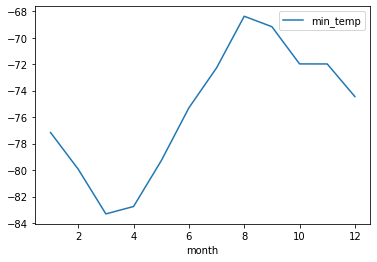

In [171]:
# Plot the average temperature by month
mmmin_df.plot()

In [172]:
# Identify the coldest and hottest months in Curiosity's location
m2_df.groupby("month").agg({"ls":"mean", "min_temp":"mean"})

,ls,min_temp
month,,
1,15.281609,-77.160920
2,44.258427,-79.932584
3,75.010417,-83.307292
4,104.365979,-82.747423
5,132.900000,-79.293333
6,164.897959,-75.299320
7,194.894366,-72.281690
8,224.347518,-68.382979
9,254.052239,-69.171642


On Mars - the Third month is the coldest, and the Eighth month is the warmest by the avg location of the Curiosity Rover

In [173]:
# 4. Average pressure by Martian month
m2_df.groupby("month").agg({"pressure":"mean"})

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.413333
6,745.054422
7,795.105634
8,873.829787
9,913.305970


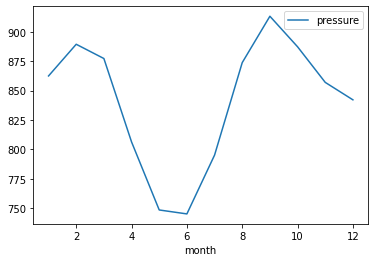

In [175]:
# Plot the average pressure by month
mmpress_df = m2_df.groupby("month").agg({"pressure":"mean"})
mmpress_df.plot()

There are approximately 700 earth days in one Mars Year


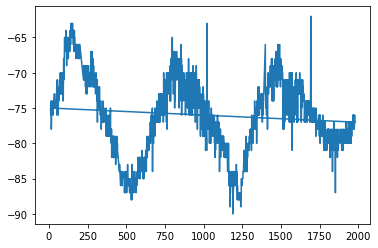

In [191]:
# 5. How many terrestrial (earth) days are there in a Martian year?
y = m2_df["min_temp"]
x = m2_df["sol"]
plt.plot(x, y)
plt.show

# from peak to peak there are aproximatly 700 sols

print ("There are approximately 700 earth days in one Mars Year")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [183]:
# Write the data to a CSV
m2_df.to_csv("../../12-Mars_News_Weather/12_News_Weather/mars_weather_final.csv")

In [ ]:
browser.quit()